In [ ]:
#from google.colab import files
#files.upload()

# Loading data 

In [1]:
import numpy as np
import pandas as pd 
import os 
#os.chdir(r'C:\Users\admin\Desktop\Hackathon\test_3BA6GZX')
test=pd.read_csv("../input/india-ml-hiring-av/test.csv", delimiter=',', nrows = None)
test.shape
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [2]:
import os 
#os.chdir(r'C:\Users\admin\Desktop\Hackathon\train_u5jK80M') 
hack=pd.read_csv("../input/india-ml-hiring-av/train.csv",delimiter=',', nrows = None)
print(hack.shape)
print(hack.head(3))
print(hack.columns)




(116058, 29)
        loan_id source       financial_institution  interest_rate  \
0  268055008619      Z  Turner, Baldwin and Rhodes          4.250   
1  672831657627      Y  Swanson, Newton and Miller          4.875   
2  742515242108      Z              Thornton-Davis          3.250   

   unpaid_principal_bal  loan_term origination_date first_payment_date  \
0                214000        360       2012-03-01            05/2012   
1                144000        360       2012-01-01            03/2012   
2                366000        180       2012-01-01            03/2012   

   loan_to_value  number_of_borrowers ...   m4  m5 m6  m7  m8  m9  m10  m11  \
0             95                  1.0 ...    0   0  0   1   0   0    0    0   
1             72                  1.0 ...    0   0  0   0   0   0    0    1   
2             49                  1.0 ...    0   0  0   0   0   0    0    0   

   m12  m13  
0    0    1  
1    0    1  
2    0    1  

[3 rows x 29 columns]
Index(['loan_id',

In [3]:
print(hack.duplicated().sum())  
test.duplicated().sum()

0


0

In [4]:
hack.head(2)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
hack=hack.drop(columns=['loan_id','origination_date','loan_purpose','first_payment_date'])
print(hack.dtypes)



source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
m13                           int64
dtype: object


In [6]:
test=test.drop(columns=['loan_id','origination_date','loan_purpose','first_payment_date'])
test.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'],
      dtype='object')

In [7]:
cat=[col for col in hack.columns if hack[col].dtype == 'object']
cat

testw=[colu for colu in test.columns if test[colu].dtype=='object']
testw

['source', 'financial_institution']

In [8]:
hack=pd.get_dummies(hack,columns=cat)
hack.columns


testw=pd.get_dummies(test,columns=testw)
testw.columns    

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'source_X', 'source_Y', 'source_Z',
       'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Sanchez, Hays and W

In [9]:
x=hack.drop(columns=['m13'])
y=hack['m13']


In [10]:
from sklearn import preprocessing as pps
std=pps.StandardScaler().fit(x[:]).transform(x[:])
x.head()
from sklearn import preprocessing as pps
#std_scale = pps.StandardScaler().fit(data1[['Reputation','Answers','Views']])
std= pps.StandardScaler().fit(x[:])
x[:]=std.transform(x[:])
x.head()

std=pps.StandardScaler().fit(testw[:]).transform(testw[:])
x.head()
from sklearn import preprocessing as pps

std= pps.StandardScaler().fit(testw[:])
testw[:]=std.transform(testw[:])
testw.head()
test=testw

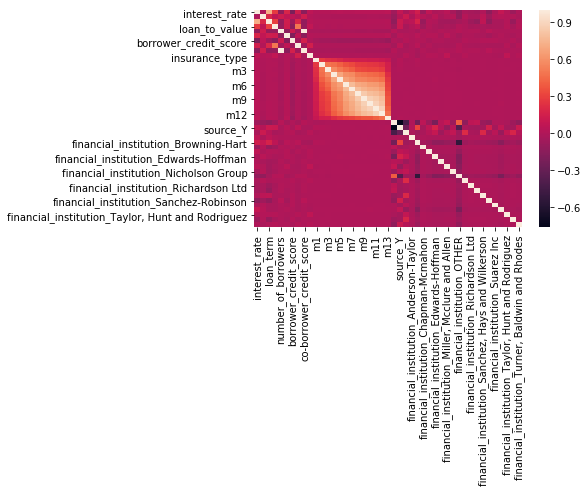

In [11]:
import seaborn as sns 
cor=hack.corr()
sns.heatmap(cor)

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=0.15)
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Resampled dataset shape Counter({0: 98098, 1: 98098})


In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

In [13]:
from sklearn.feature_selection import f_regression, chi2,SelectKBest,f_classif
sigfea=SelectKBest(score_func=f_classif,k=25)
trans=sigfea.fit_transform(x,y)
chi_support=sigfea.get_support()
chi_features = x.loc[:,chi_support].columns.tolist()
print(chi_features)

['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'source_X', 'source_Y', 'financial_institution_Edwards-Hoffman', 'financial_institution_Sanchez-Robinson']


In [ ]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
log =LogisticRegression(solver='lbfgs')
# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C = np.logspace(0.001, 5, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 5-fold cross validation
clf = GridSearchCV(log, hyperparameters, cv=6, verbose=0)
# Fit grid search
best_model = clf.fit(x_train, y_train)  # 

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
from sklearn.metrics import f1_score
log1 =LogisticRegression(solver='lbfgs',C=3,penalty='l2') #3.6011768069240193
log1.fit(x_train,y_train) 
y_pred1 = log1.predict(x_test)
score1 =f1_score(y_test,y_pred1) 
score1

In [ ]:
from sklearn import tree 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
deci=tree.DecisionTreeClassifier(criterion='gini') # ,max_depth=3
deci_fit=deci.fit(x_train,y_train)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'max_depth': [i for i in range(1,10)],
          'random_state':[123]}
rf_random = RandomizedSearchCV(estimator = deci, param_distributions = params, n_iter = 100, cv = 3, verbose=0, random_state=42)
rf_random.fit(x_train,y_train)
print('Best Penalty:', rf_random.best_estimator_.get_params())
rf_random.best_params_ 


In [ ]:
deci1=tree.DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=123, min_samples_split=5, min_samples_leaf= 1, max_features= 'sqrt')
deci_fit=deci1.fit(x_train,y_train)
y_pred2 = deci1.predict(x_test)
score2 =f1_score(y_test,y_pred2) 
score2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()


model.fit(x_train,y_train)

param_rando = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'n_jobs':[-1]}
random = RandomizedSearchCV(estimator = model, param_distributions = param_rando, n_iter = 10, cv = 6, verbose=0, random_state=42)
random.fit(x_train,y_train) 
#print('features', model.best_estimator_.get_params())
random.best_params_       

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier(n_jobs=-1,random_state=123,n_estimators= 25,
 min_samples_split= 3,
 min_samples_leaf= 1,
 criterion= 'entropy')
#learning
model.fit(x_train,y_train)
#Prediction

prediction=model.predict(x_test)
rando_ =f1_score(y_test,prediction) 
rando_


In [ ]:
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

clf = xgb.XGBClassifier()
param_grid = {
        
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [i  for i in range(1,50)]}

xgboo = RandomizedSearchCV(clf, param_grid, n_iter=10,
                            n_jobs=-1, verbose=1, cv=4, random_state=42)
xgboo.fit(x_train,y_train)
xgboo.best_params_

In [ ]:
print(type(x_train))
print(type(x_test.to_numpy))
print(type(y_train))

print(type(y_test.to_numpy()))


In [ ]:
xgboost = xgb.XGBClassifier(subsample= 0.7,
 reg_lambda= 5.0,
 n_estimators= 32,
 min_child_weight= 10.0,
 max_depth= 15,
 
 learning_rate = 0.1,
 colsample_bytree= 1.0, 
 gamma= 1.0,
 colsample_bylevel=1.0,
 n_folds=-1)
xgboost.fit(x_train,y_train) 

y_pred1 = xgboost.predict(x_test)
score3 =f1_score(y_test,y_pred1) 
score3

In [ ]:
from sklearn.svm import SVC
model = SVC() 
model.fit(x_train, y_train) 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = RandomizedSearchCV(model, param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 
grid.best_params_

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
model = SVC() 
model.fit(x_train,y_train) 

y_pred1 = model.predict(x_test)
score3 =f1_score(y_test,y_pred1) 
score3